# Technical Overview

In this project, I have created a sentiment analysis of the Destiny community on Twitter. This involved the develop of a Binary classification model that predicts the sentiment of tweets with #destinythegame based on a target variable formulated through a SentimentIntensityAnalyzer. This project can be used to predict the current sentiment of the Destiny community as well as providing inference on the community's likes and dislikes of the current state of the game. 

A list of the top words within positive and negative tweets were extracted and used to create columns that holds a count of the number of positive words and negative words within each tweet. After removing punctuation, uppercase letters, and urls sklearn's CountVectorizer was used to remove stopwords and vectorize. The majority class was used as the baseline which was 53% negative. The final model was a simple logistic regression with a thousand iterations. The final test score was 78%.

# Overview

In 2014, Bungie released an new game that many had anticipated. An epic sci-fi that follows the player through a fight between light and dark as old as the universe itself.  Within 24 hours of the game's release, the Destiny revenue hit $500 million dollars. Bungie had created a massive MMORPG that has been able to captivate millions of players with in depth lore, multiplayer campaigns and competitve player versus player. 7 years of Destiny has brought many good memories, adventures and even new friends to the vast community. 

## Businesss Understanding

Bungie has been fantastic at providing players with new content quicker than most AAA games, releasing updates to the ongoing story and new missions nearly every three months.
Now that they have provided the name and release date of the final expansion, Bungie seeks insight into the current sentiment of the Destiny Community on Twitter.

## Data Overview

Using the free Elevated access of the Twitter API, 6.3 thousand tweets were scraped from the week before access request. With this access, a total of 900 tweets every 15 minutes was the rate at which tweets could be scraped. The python package 'tweepy' was used to scrape the tweets. The user ID, date, language, number of favorites, number of retweets and text of the tweet was scraped; only the text was used for the entirety of the project. None of these tweets were retweets. 

### Refer to 'code' File for Exact Function Operations

### Imports

In [1]:
import nltk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix
import pandas as pd

import code.auth_and_scrape as get_tweets
import code.preparation as prep
import code.visualization as viz

#nltk.download('vader_lexicon')
#nltk.download('punkt')

### Twitter API Authentication and Scrape

Four keys provided upon granted access are needed for authentication.

In [ ]:
get_tweets.authenticate(key, key_secret, access, access_secret)

The tweets were scraped from twitter and immediately placed into csv format to easily access and read within pandas.

In [5]:
get_tweets.scrape_and_place()

# of Tweets added from this response:  900
# of Tweets added from this response:  900
# of Tweets added from this response:  900
# of Tweets added from this response:  900
# of Tweets added from this response:  900
# of Tweets added from this response:  900
# of Tweets added from this response:  900


### Visualize and Clean

In [2]:
df = pd.read_csv('data/data.csv')
df.head()

,id,created_at,language,favorites,retweets,text
0,1462933594754670600,2021-11-22 23:58:43+00:00,en,0,0,@DestinyTheGame all id like is to be at least ...
1,1462933098887266308,2021-11-22 23:56:45+00:00,en,0,0,@DestinyTheGame Can someone please explain to ...
2,1462932969086087176,2021-11-22 23:56:14+00:00,en,1,0,@techaftmidnight @GoogleStadia @DestinyTheGame...
3,1462932844418842632,2021-11-22 23:55:44+00:00,en,1,0,Going live in 5 minutes!! Let's go GOD SQUAD!!...
4,1462932760515985420,2021-11-22 23:55:24+00:00,en,0,0,"@A_dmg04 @DestinyTheGame Dear Eva, please brin..."


In [3]:
df.text[1]

'@DestinyTheGame Can someone please explain to me why I (top 7-10%ish player) keep getting teamed with people in the… https://t.co/fREoFm7Emb'

This tweet has a ton of punctuation and it even includes a url. In order for the sentiment analyzer to be able to read and understand this, these aspects must be removed and all uppercase letters lowered. Here A function has been create to do this.

In [4]:
df = prep.clean_tweets(df)
df.head()

,id,created_at,language,favorites,retweets,text,clean_text
0,1462933594754670600,2021-11-22 23:58:43+00:00,en,0,0,@DestinyTheGame all id like is to be at least ...,all id like is to be at least decent in cruc...
1,1462933098887266308,2021-11-22 23:56:45+00:00,en,0,0,@DestinyTheGame Can someone please explain to ...,can someone please explain to me why i top ...
2,1462932969086087176,2021-11-22 23:56:14+00:00,en,1,0,@techaftmidnight @GoogleStadia @DestinyTheGame...,sekiroshadowsdietwice cyberpunk2077 ...
3,1462932844418842632,2021-11-22 23:55:44+00:00,en,1,0,Going live in 5 minutes!! Let's go GOD SQUAD!!...,going live in 5 minutes let s go god squad ...
4,1462932760515985420,2021-11-22 23:55:24+00:00,en,0,0,"@A_dmg04 @DestinyTheGame Dear Eva, please brin...",dmg04 dear eva please bring me gambit jad...


Now that the data is cleaned, to create a target variable the data will be run through a sentiment analyzer. This uses a TextBlob and SentimentIntensityAnalyzer to create a dataframe with the polarity, subjectivity, and sentiment of a tweet.

In [5]:
df_probs = prep.create_sentiment_neu(df)

This analyzer shows the tweets are overwhelmingly neutral. 

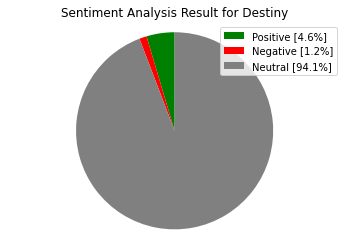

In [6]:
viz.pie_chart(df_probs)


Neutral tweet exploration

In [7]:
df_neu_uncleaned = prep.create_neu_df(df, df_probs)

In [8]:
df_neu_cleaned = prep.clean_tweets(df_neu_uncleaned)

In [9]:
df_neu_cleaned.clean_text[17]

'  dear eva    bring some good looking warlocks helmets i m sick and tired of using only two'

In [10]:
df_neu_cleaned.clean_text[20]

'  i wish bungie would stop taking content people paid for out of the game  '

In [14]:
df_neu_cleaned.clean_text[53]

'  dearest space grandmama     along side the joy you bring to us each visit  all i ask is for high stat  '

In [15]:
df_neu_cleaned.clean_text[143]

'  dear eva     i wish you well and hope you re prepping for the anniversary     i m thrilled   could y  '

This analyzer spits out 4 different scores for each tweet, a positive, negative, neutral and compound score. There seems to be some tweets within the neutral category that are clearly positive and negative so we will strictly focus on those two scores.

In [16]:
df_probs = prep.create_sentiment(df)

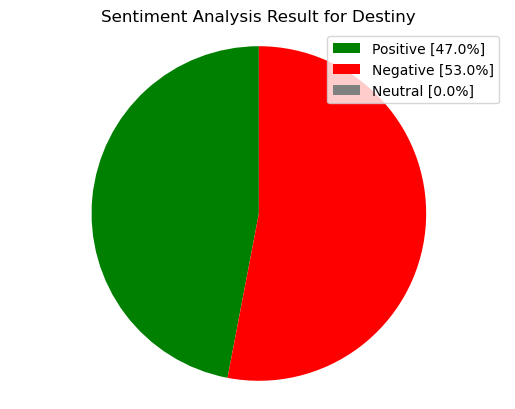

In [21]:
viz.pie_chart(df_probs)

Feature Engineering the Positives and Negatives

Two dataframes are created, one with specifically tweets that had a positive sentiment and another that was created specifically with tweets that had a negative sentiment.

In [22]:
df_pos_uncleaned = prep.create_pos_df(df, df_probs)

In [26]:
df_pos_cleaned = prep.clean_tweets(df_pos_uncleaned)
df_pos_cleaned.head()

,index,text,sentiment,clean_text
0,0,@DestinyTheGame all id like is to be at least ...,1.0,all id like is to be at least decent in cruc...
1,1,@DestinyTheGame Can someone please explain to ...,1.0,can someone please explain to me why i top ...
2,3,Going live in 5 minutes!! Let's go GOD SQUAD!!...,1.0,going live in 5 minutes let s go god squad ...
3,4,"@A_dmg04 @DestinyTheGame Dear Eva, please brin...",1.0,dmg04 dear eva please bring me gambit jad...
4,5,A PS5 would be nice https://t.co/NywWHkzJaA,1.0,a ps5 would be nice


In [28]:
df_neg_uncleaned = prep.create_neg_df(df, df_probs)
df_neg_cleaned = prep.clean_tweets(df_neg_uncleaned)
df_neg_cleaned.head()

,text,sentiment,clean_text
2,@techaftmidnight @GoogleStadia @DestinyTheGame...,0.0,sekiroshadowsdietwice cyberpunk2077 ...
10,@DestinyTheGame Letter to grandma Eva https://...,0.0,letter to grandma eva
12,@workingklassred @Xbox @DestinyTheGame Lies yo...,0.0,lies you re a bin dipper
14,SPARROW RACING LEAGUE!!! https://t.co/S8rDgduGcv,0.0,sparrow racing league
17,@DestinyTheGame Dear Eva\r\n\r\nBRING SOME GOO...,0.0,dear eva bring some good looking warlocks...


Two lists of the top most frequent words that occured in each dataframe are created.

In [29]:
positives_and_count, pos_vec = prep.top_n_gram(df_pos_cleaned['clean_text'], (1,1), 300)

positives = [x[0] for x in positives_and_count]
top_10_pos = positives[:10]
positives_minus_top_10 = [x for x in positives if x not in top_10_pos]
print(positives_minus_top_10)

['destiny2', 'threadsoflight', 'game', 'play', 'congrats', 'thanks', 'bring', 'destinythegame', 'make', 'really', 'don', 'hope', 'great', 'time', 'nice', 'better', 'new', 'day', 'playing', 'looks', 'congratulations', 'yeah', 'bungie', 'know', 'happy', 'trials', 'help', 'awesome', 'think', 've', 'going', 'dawning', 'wish', 'year', 'fun', 'got', 'space', 'hunter', 'people', 'shader', 'look', 'best', 'd2', 'live', 'crow', 'grandma', 'free', 'let', 'need', 'amazing', 'today', 'twab', 'friends', 'll', 'guardian', 'lol', 'week', 'use', 'getting', 'god', 'cool', 'pvp', 'changes', 'work', 'come', 'double', 'amp', 'right', 'looking', 'titan', 'team', 'maybe', 'ability', 'actually', 'oh', 'win', 'vex', 'pretty', 'flawless', 'thememe', 'super', 'man', 'played', 'rewards']


In [30]:
negatives_and_count, neg_vec = prep.top_n_gram(df_neg_cleaned['clean_text'], (1,1), 300)

negatives = [x[0] for x in negatives_and_count]
top_10_neg = negatives[:10]
negatives_minus_top_10 = [x for x in negatives if x not in top_10_neg]
print(negatives_minus_top_10)

['time', 'don', 'new', 'got', 'make', 'warlock', 'destiny2art', 'twab', 'caiatl', 'titan', 'going', 'did', 'like', 've', 'light', 'thememe', 'trials', 'shit', 'day', 'getting', 'know', 'right', 'hey', 'think', 'queen', 'pvp', 'asking', 'll', 'live', 'let', 'talking', 'weapons', 'destinyfashion', 'pass', 'bad', 'crucible', 'probably', 'people', 'fucking', 'say', 'bring', 'wait', 'come', 'witch', 'destinyart', 'look', 'gonna', 'raid']


Now two columns are created, one of positive wordcount within the tweets and one of negative word count within the tweets.

In [31]:
pos_features = [
    (prep.create_features(review, positives_minus_top_10))
    for review in df['clean_text']]

In [32]:
neg_features = [(prep.create_features(review, negatives_minus_top_10))
                for review in df['clean_text']]

In [33]:
df_feat = pd.concat([df['clean_text'], pd.DataFrame(pos_features,columns=['positive_word_count']), 
                     pd.DataFrame(neg_features,columns=['negative_word_count'])], axis=1)

In [34]:
df_feat.head()

,clean_text,positive_word_count,negative_word_count
0,all id like is to be at least decent in cruc...,0,2
1,can someone please explain to me why i top ...,2,2
2,sekiroshadowsdietwice cyberpunk2077 ...,0,0
3,going live in 5 minutes let s go god squad ...,7,4
4,dmg04 dear eva please bring me gambit jad...,2,1


### Train-test split

In [37]:
# Train-test split
X_train,X_test,y_train,y_test = train_test_split(df_feat, df_probs['sentiment'],random_state=1)

Words are ran through a vectorizing function and new vecotrized dataframes are created. 

In [38]:
feat, feat_vec_train = prep.top_n_gram(X_train['clean_text'], (1,1), 100)
feat, feat_vec_test = prep.top_n_gram_test(X_test['clean_text'], X_train['clean_text'], (1,1), 100)

X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

#Create X_train vectorized
X_train_vec = pd.concat([X_train.drop('clean_text', axis=1), pd.DataFrame(feat_vec_train.todense())], axis=1)
X_test_vec = pd.concat([X_test.drop('clean_text', axis=1), pd.DataFrame(feat_vec_test.todense())], axis=1)

### Modeling

#### Baseline

Baseline model is the majority class at 53.4% negative.

In [19]:
y_train.value_counts()[0]/y_train.shape[0]

0.5337566137566138

#### Logistic Regression

For sentiment analysis, the preprocessing steps determine the outcome of the model so here a simple logistic regression is fit to the train and scored on the test. The final accuracy comes out to be 78.9%. 

In [39]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_vec, y_train)
log_model.score(X_test_vec, y_test)

0.7892063492063492

### Scoring

In [40]:
cross_val = cross_val_score(log_model, X_test_vec, y_test).mean()
cross_val

0.7784126984126984

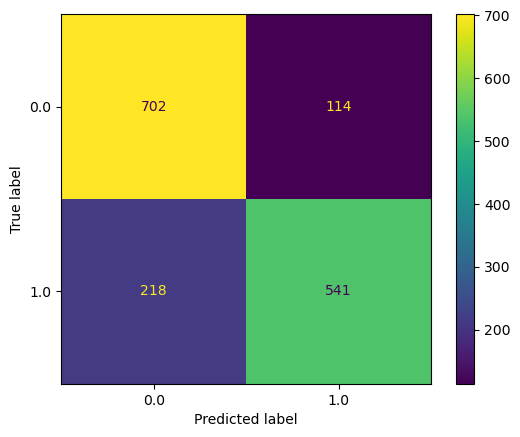

In [41]:
plot_confusion_matrix(log_model, X_test_vec, y_test);

## Recommendations

This project revealed that filtering for positive and negative tweets could be a great tool to understand what the destiny community is thinking at the time of scraping. This model is great at helping understand current sentiment of the Destiny community; understanding the community's concerns or even their favorite aspects of the game. Using this to help filter bugs, improve gameplay and getting overall general feedback is advised.

## Future Research

Now that twitter has been scraped, more platforms that have a large destiny community presence would be a good idea to scrape. Scraping the destiny forums, Reddit and even Twitch chats would be helpful an acquiring a larger sense of the entire community's sentiment toward the game. 

As the frustration of cheaters ruining gameplay grows, Bungie is looking for help in anti-cheat. Scraping platforms like Reddit, where users flaunt their extreme success to possibly identify fraudulent gameplay is an action that can help toward removing those players from the game.